In [ ]:
import os
import wave
import matplotlib.pyplot as plt
import random
import data_converter
import shutil
import numpy as np
import cv2

def file_length_histogram(folder):
    durations = []

    for file in os.listdir(folder):
        if file.endswith(".wav"):
            with wave.open(os.path.join(folder, file), 'r') as w:
                frames = w.getnframes()
                rate = w.getframerate()
                durations.append(frames / float(rate))

    plt.hist(durations, bins=50, edgecolor='black')
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Number of files")
    plt.title("WAV File Duration Histogram")
    plt.show()

def audio_count_histogram(folder):
    audio_counts = []

    for file in os.listdir(folder):
        if file.endswith(".npy"):
            reps = file.split("_")[-1].split(".")[0]
            audio_counts.append(int(reps))

    plt.hist(audio_counts, bins=range(min(audio_counts), max(audio_counts) + 2), edgecolor='black', align='left')
    plt.xlabel("Audio Repetitions in File")
    plt.ylabel("Count")
    plt.title("Histogram of Audio Repetitions")
    plt.show()

def visualise_random_sample(path="/scratch/local/ssd/hani/countix-av-spec/test/"):
    choice = random.choice(os.listdir(path))
    print("Visualizing:", choice)
    a = np.load(os.path.join(path, choice))
    if a.ndim == 3:
        a = a.mean(axis=0)

    plt.figure(figsize=(5, 5))  # width, height in inches = pixels / DPI
    plt.imshow(a, origin='lower', aspect='equal', cmap="magma")
    plt.axis('off')
    plt.show()
    
def visualise_bilateral_sample(path="/scratch/local/ssd/hani/countix-av-spec/train/"):
    choice = random.choice(os.listdir(path))
    print("Visualizing:", choice)
    a = np.load(os.path.join(path, choice))
    if a.ndim == 3:
        a = a.mean(axis=0)
    filtered = cv2.bilateralFilter(a.astype(np.float32), d=9, sigmaColor=75, sigmaSpace=75)
    plt.figure(figsize=(15, 7))  # width, height in inches = pixels / DPI
    plt.subplot(1, 2, 1)
    plt.title("Original Spectrogram")
    plt.imshow(a, origin='lower', aspect='equal', cmap="magma")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Bilateral Filtered Spectrogram")
    plt.imshow(filtered, origin='lower', aspect='equal', cmap="magma")
    plt.axis('off')

    plt.show()
    
def create_example_wav():
    converter = data_converter.DataConverter()
    
    choice = random.choice(os.listdir("/scratch/local/ssd/hani/FSD50K/train/"))
    filepath = os.path.join("/scratch/local/ssd/hani/FSD50K/train/", choice)

    y, sr, num_repetitions = converter.create_augmented_wav(filepath, converter.output_time, converter.max_repetitions)
    print("Repetitions:", num_repetitions)
    y, sr = converter.add_musan_noise(y, sr, snr_db_range=(0, 10), debug_wav=True)

Visualizing: 40193_spec_0_6.npy


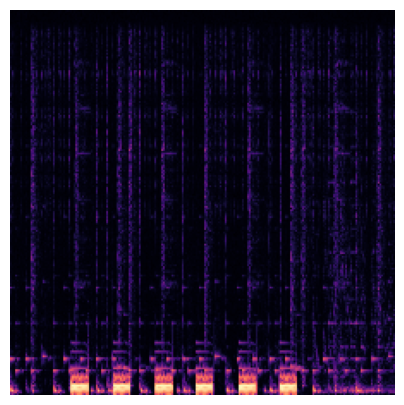

Visualizing: 284_2.npy


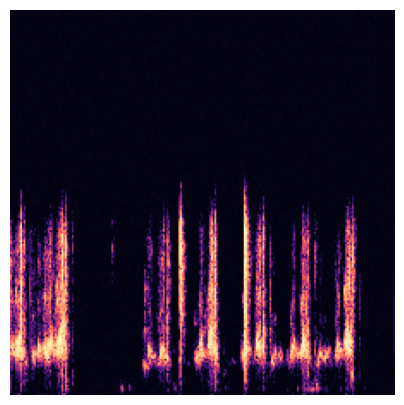

Visualizing: 15_7.npy


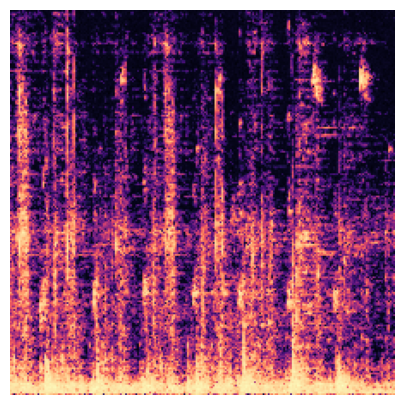

In [ ]:
visualise_random_sample(path="/scratch/local/ssd/hani/RepeatVeryNoisy/train/")
visualise_random_sample()
visualise_random_sample(path="/scratch/local/ssd/hani/extreme-spec/test/")
# visualise_bilateral_sample()

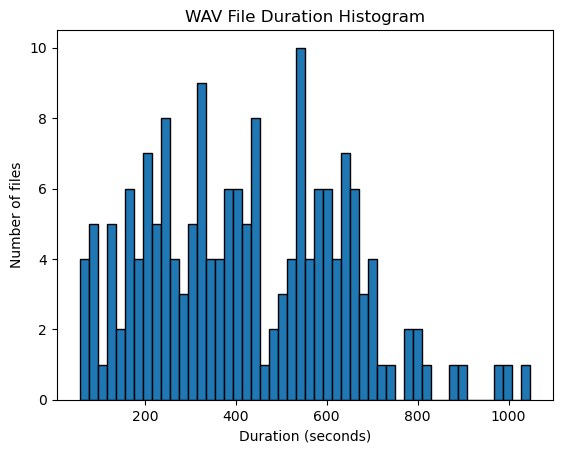

In [4]:
file_length_histogram("/scratch/local/ssd/hani/musan/speech/librivox/")

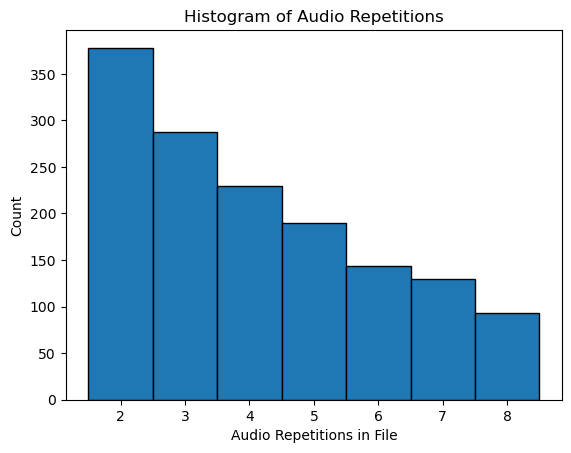

In [8]:
audio_count_histogram("/scratch/local/ssd/hani/countix-av-spec/train/")

In [ ]:
converter = data_converter.DataConverter()
converter.visualize_npy("/scratch/local/ssd/hani/extreme-spec/15_7.npy", "spec.png")

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/local/ssd/hani/extreme-spec/15_7.npy'